In [34]:
import pandas as pd
import numpy as np
import copy
import random
from __future__ import division
from __future__ import with_statement
import minimization as minz #My script in same folder for minimization routines
import matplotlib.pyplot as plt
%matplotlib inline

Import all the data available for the 'nosignalX' run. I have 6 runs, each with 2,000 generations.

For each run I have epochs_av, epochs_jm, jm and summary.

They are stored in the dictionary 'shortsns'.

In [125]:
n_states = 8
n_signals = 0 #only without signal for now
n_rounds = 50
N = 40
n_parents = 20

experiment_clues = ['nosignal1','nosignal2','nosignal3','nosignal4','nosignal5', 'nosignal6']
file_types = {'epochs_av':'ep', 'epochs_jm':'epj', 'jm':'jms', 'summary':'summ'} #a shorter name for each type of data


#Path to Python outputs
python_folder = "/Users/luisalejandrolee/Dropbox/Thesis Phd/\
Coordination autos Chapter three/outputs_from_python/" #Python (minimization) outputs in this folder

#A dictionary with all the dataframes from the nosignalX treatments, for epochs, epochs_av, jms and summary.
shortns = minz.import_processed_runs(experiment_clues, file_types, python_folder,\
                                                   n_states , n_signals, n_rounds, N, n_parents)

In [126]:
#careful if changing i. Is for selecting one particular run (for example, to graph only one panel
#for data on 'nosignal3', then i=3). Be default is 1, so it starts in the first data set, and continuous from there
def create_panels_figure(data, df, variables, rows, cols, i=1):
    fig, axes = plt.subplots(rows, cols, squeeze=False, sharex=True, sharey=True) #squeeze allows creation of 1 col or 1 row
    i += (-1) #keep track of the number of panels
    for row in xrange(rows):
        for col in xrange(cols):
            i+=1
            for v in variables:
                my_label = ('Row' if v=='av_score_row' else 'Column' if v=='av_score_col' else '?')
                x = data[df+'%s'%i][v] #For example, df+'%s'%i = 'ep'+'2' = ep2, which is the name of dataframe
                axes[row][col].plot(x,label=my_label)
                
    #Change aesthetics
    
    plt.close()
    return fig, axes #export both the figure and subplots

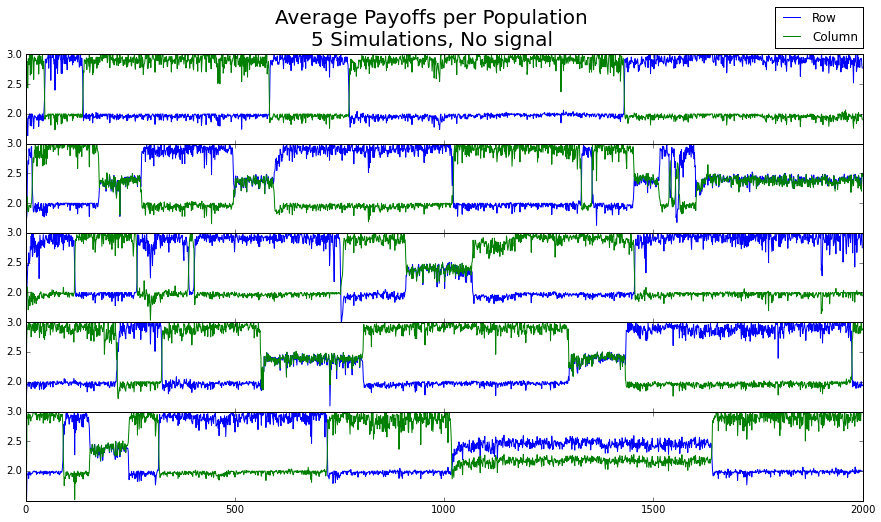

In [188]:
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
#variables = ['unvisited_measure']
#variables = ['coordination_A_perc', 'coordination_B_perc']
variables = ['av_score_row', 'av_score_col']
#variables = ['coordination_A_perc', 'coordination_B_perc']


fig,axes = create_panels_figure(shortns, 'summ', variables, rows=5, cols=1, i=2)
fig.suptitle('Average Payoffs per Population\n5 Simulations, No signal',fontsize=20)
fig.subplots_adjust(wspace=0, hspace=0)
fig.set_size_inches(15, 8) #size of the whole figure

axes[0][0].set_ylim([1.5,3]) #since sharex=True, changing for one subplot changes all of them
axes[0][0].set_yticks([2,2.5,3])
axes[0][0].set_xlabel('Generations')
axes[0][0].legend(bbox_to_anchor=(1.007, 1.6))

plt.close()


fig

In [ ]:
#Useful lines (not part of the code, but just to copy easily)

vlines(x, ymin, ymax) #horizontal and vertical lines
hlines(y, xmin, xmax)

#ax is the name of the plot. If used fig, axes = plt.subplot(2,2) to create several, they can be indexed
ax.set_yscale('log') #some regularly useful 'set' functions
ax.set_xlim([0,10])
ax.set_xlabel('some label')

fig.tight_layout() #avoids overlapping of axis ticks

#small code for adding several vertical lines in a particular plot (first make the relevant figure to be current)
h_values = [200, 300, 400]
for v in h_values:
    axes[0][0].vlines(v,0,3,linewidth=5, color='r')

axes[0][0].set_title('5 Simulations, No signal')
axes[0][0].set_xlabel('Generations')
axes[0][0].set_ylabel('Average Payoffs')



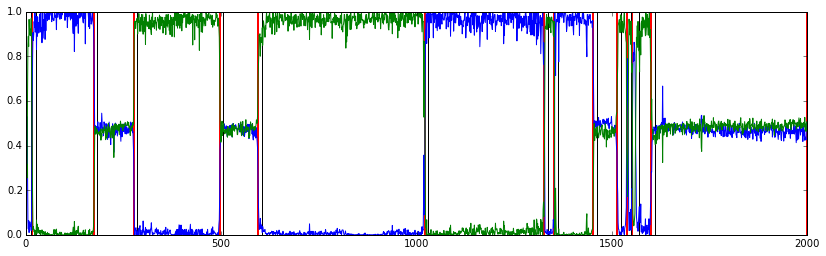

In [185]:
epochs3 = shortns['ep3']
ends = list(epochs3.start)
starts = list(epochs3.end)

#variables1 = ['coordination_A_perc', 'unvisited_measure_row']
variables1 = ['coordination_A_perc','coordination_B_perc']

fig1, ax = create_panels_figure(shortns, 'summ', variables1, rows=1, cols=1,i=3)
fig1.set_size_inches(14,4)

for v,vv in zip(starts,ends):
    ax[0][0].vlines(v,0,1,linewidth=2, color='r')
    ax[0][0].vlines(vv,0,1,linewidth=1, color='k')
fig1

In [167]:
ends

[12.0,
 25.0,
 183.0,
 284.0,
 504.0,
 604.0,
 1030.0,
 1336.0,
 1362.0,
 1461.0,
 1523.0,
 1550.0,
 1570.0,
 1610.0]

In [184]:
epochs1 = shortns['ep6']
epochs2 = shortns['epj6']
joints1 = shortns['jms6']
joints1[(joints1.freq_perc>80) & (joints1.generation>1500)]


,generation,min_jms,freq,parents_index,freq_perc,jm_show
54873,1618,"((('A', 'A'), ('B', 'B'), ('B', 'B'), ('A', 'B...",1292,1292,80.7500,AA BB BB AB AA >> BB BB AA BB <<
56084,1642,"((('A', 'A'),), 0)",1404,1404,87.7500,>> AA <<
56144,1644,"((('A', 'A'),), 0)",1404,1404,87.7500,>> AA <<
56173,1645,"((('A', 'A'),), 0)",1360,1360,85.0000,>> AA <<
56205,1646,"((('A', 'A'),), 0)",1400,1400,87.5000,>> AA <<
56234,1647,"((('A', 'A'),), 0)",1444,1444,90.2500,>> AA <<
56263,1648,"((('A', 'A'),), 0)",1480,1480,92.5000,>> AA <<
56287,1649,"((('A', 'A'),), 0)",1520,1520,95.0000,>> AA <<
56304,1650,"((('A', 'A'),), 0)",1600,1600,100.0000,>> AA <<
56305,1651,"((('A', 'A'),), 0)",1480,1480,92.5000,>> AA <<


In [152]:
joints1

,generation,min_jms,freq,parents_index,freq_perc,jm_show
0,0,"((('A', 'A'),), 0)",70,70,4.3750,>> AA <<
1,0,"((('B', 'B'),), 0)",48,48,3.0000,>> BB <<
2,0,"((('A', 'B'),), 0)",35,35,2.1875,>> AB <<
3,0,"((('B', 'A'), ('A', 'B')), 1)",24,24,1.5000,BA >> AB <<
4,0,"((('B', 'A'),), 0)",21,21,1.3125,>> BA <<
5,0,"((('A', 'A'), ('A', 'B')), 1)",20,20,1.2500,AA >> AB <<
6,0,"((('B', 'A'), ('B', 'B'), ('B', 'A')), 2)",16,16,1.0000,BA BB >> BA <<
7,0,"((('A', 'A'), ('A', 'B'), ('B', 'A')), 2)",9,9,0.5625,AA AB >> BA <<
8,0,"((('A', 'A'), ('A', 'B'), ('B', 'B'), ('A', 'B...",9,9,0.5625,AA AB BB >> AB <<
9,0,"((('A', 'A'), ('B', 'A')), 1)",9,9,0.5625,AA >> BA <<


In [137]:
epochs1

,epoch,duration,start,end
0,Domination_AA,79,10,89
1,Domination_BB,55,98,153
2,Turn_Taking,84,161,245
3,Domination_AA,64,254,318
4,Domination_BB,394,326,720
5,Domination_AA,288,729,1017
6,Biased_Turn_B,612,1027,1639
7,Domination_AA,352,1648,2000
